# Introduction to Lyncs

This is an introductory presentation to Lyncs.

It contains some examples describing the main features of the API.

Lyncs is a Python API for lattice field theory simulations with a main focus on lattice QCD.

## Lyncs lattice and field objects

The lattice field theory is represented by the `lyncs.Lattice` object.

It contains all the information needed for performing a simulation or a measurement.

In [1]:
import lyncs as ly
lattice = ly.Lattice(dims=4, dofs="QCD")
lattice

Lattice(dims = {'t': 1, 'x': 1, 'y': 1, 'z': 1},
        dofs = {'spin': 4, 'color': 3},
        dtype = dtype('complex128'),
        properties = {'time': ['t'], 'space': ['x', 'y', 'z'], 'gauge_dofs': ['color']})

*NOTE: Lyncs objects try to have a representation that contains all the information of the object.*

Here we have created a four dimensional lattice with four dimensions (x,y,z,t) and with the degree of freedom of QCD, i.e. color and spin.

The lattice dimensions and properties can be edited in a very simple and flexible manner as follows.

In [2]:
lattice.t = 8
lattice['x'] = 4
lattice.space = 4
lattice

Lattice(dims = {'t': 8, 'x': 4, 'y': 4, 'z': 4},
        dofs = {'spin': 4, 'color': 3},
        dtype = dtype('complex128'),
        properties = {'time': ['t'], 'space': ['x', 'y', 'z'], 'gauge_dofs': ['color']})

On the lattice we can define fields. This is done with the `lyncs.Field` class.

Several field types are implemented, e.g. scalar, vector, etc. Or a custom one can be defined by giving a list of properties of the lattice.

In [3]:
field = ly.Field(lattice=lattice, field_type="vector")
field.shape

[('t', 8), ('x', 4), ('y', 4), ('z', 4), ('spin', 4), ('color', 3)]

Above we have the shape of the field and here belove the representation of the field.

In [4]:
field

Field(array = TunableDelayed('zero_array-0c7a4b14b69115332414472cfeb3e117'),
      lattice = Lattice(dims = {'t': 8, 'x': 4, 'y': 4, 'z': 4},
                        dofs = {'spin': 4, 'color': 3},
                        dtype = dtype('complex128'),
                        properties = {'time': ['t'], 'space': ['x', 'y', 'z'], 'gauge_dofs': ['color']}),
      field_type = 'vector',
      tunable_options = {'shape_order': Permutation(['t', 'x', 'y', 'z', 'spin', 'color']), 'chunks': ChunksOf({'t': 8, 'x': 4, 'y': 4, 'z': 4, 'spin': 4, 'color': 3})},
      tuned_options = {})

*NOTE: The field has not been allocated and its array content is a TunableDelayed object.* 

The field has been created only in a lazy manner and will not be allocated or computed until we explicitly ask to evaluate its content.

In such way we can postpone decisions on the structure and distribution of the field accordingly to the calculations that will be performed in order to optimize the time to solution.

The free parameters of the field are named tunable options (`field.tunable_options`) and these can be tuned or set. 

Delayed objects represent a graph containing all the steps to perform the computation. This can be visualized to explore the dependency of the graph.

In the following we show in red the tunable objects with the list of tunable options.

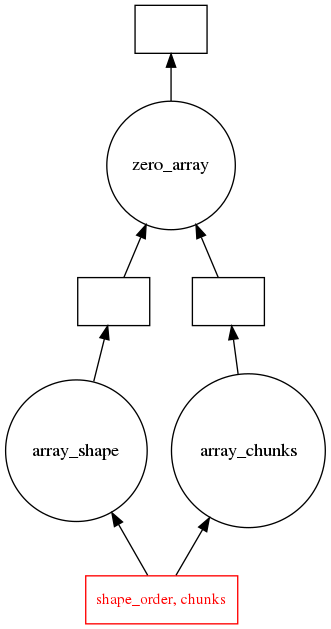

In [5]:
field.array.visualize()

A not tuned property of the field is a delayed attribute.

In [6]:
field.shape_order

TunableDelayed('getattr-43aa721ae450f8869fefb615a6711894')

When the value of a tunable option is set or tuned, this becomes a tuned option and cannot be changed anymore.

In [7]:
field.shape_order.tune()

['t', 'x', 'y', 'z', 'spin', 'color']

Now only chunks is a tunable option.

In [8]:
field.tunable_options

{'chunks': ChunksOf({'t': 8, 'x': 4, 'y': 4, 'z': 4, 'spin': 4, 'color': 3})}

In [9]:
field.chunks = {'t':4}
field.tuned_options

{'shape_order': ['t', 'x', 'y', 'z', 'spin', 'color'], 'chunks': {'t': 4}}

Now that all the tunable options have been computed, the field array is well defined and it's not a *TunableDelayed* object anymore.

In [10]:
field.array

dask.array<zeros, shape=(8, 4, 4, 4, 4, 3), dtype=complex128, chunksize=(4, 4, 4, 4, 4, 3), chunktype=numpy.ndarray>

## Lyncs high-level framework

In lyncs we try as much as possible to deduce at runtime information about the run providing a very user-friendly framework.

For instance when one needs to load a gauge-configuration from a stored file, one does not need to provide any information about the lattice or the file format (e.g. 'lime' in the following case) and these will be automatically deduced at runtime.

In [11]:
import lyncs as ly
conf_path = "conf.1000"
gauge_conf = ly.load(conf_path)
gauge_conf

Field(array = TunableDelayed('read_array-4ec22862710266b48e1f9d8cfa9c3a27'),
      lattice = Lattice(dims = {'t': 4, 'x': 4, 'y': 4, 'z': 4},
                        dofs = {'spin': 4, 'color': 3},
                        dtype = dtype('complex128'),
                        properties = {'time': ['t'], 'space': ['x', 'y', 'z'], 'gauge_dofs': ['color']}),
      field_type = 'gauge_links',
      tunable_options = {'chunks': ChunksOf({'t': 4, 'x': 4, 'y': 4, 'z': 4, 'color': 3, 'n_dims': 4})},
      tuned_options = {'shape_order': ['x', 'y', 'z', 't', 'n_dims', 'color', 'color']})

Again the field has been created lazily postponing the reading of the data content in a next step (\`TunableDelayed('read_array-...')\`).

*NOTE: the shape_order is fixed because the array stored in the file has a fixed order.*

On the other hand all the information needed for proceeding have been extracted from the file and the field object is well defined.

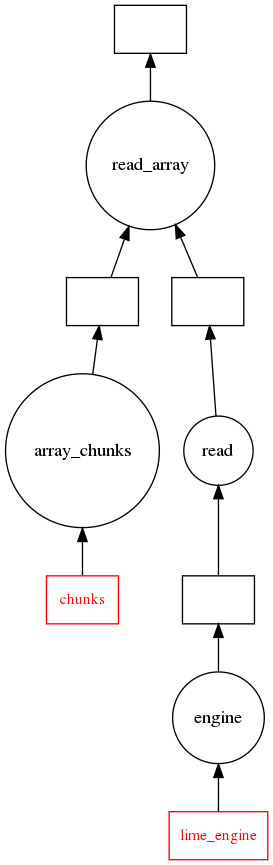

In [12]:
gauge_conf.array.visualize()

In [13]:
gauge_conf.chunks.tune()
gauge_conf.array

,Array,Chunk
Bytes,147.46 kB,147.46 kB
Shape,"(4, 4, 4, 4, 4, 3, 3)","(4, 4, 4, 4, 4, 3, 3)"
Count,4 Tasks,1 Chunks
Type,complex128,numpy.ndarray
